In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from scipy.ndimage import gaussian_filter1d

## Curvature

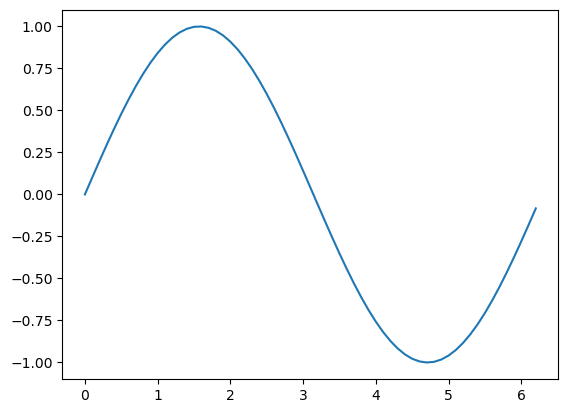

In [153]:
x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x)
plt.plot(x, y);

**Gradient**
*(`np.gradient()`)*

- At interior points ($i = 1$ to $n - 2$):

$$\left. \frac{df}{dx} \right|_i = \frac{f_{i+1}-f_{i-1}}{2h}$$

- At boundaries:

    - First point ($i=0$):

$$\left. \frac{df}{dx} \right|_0 = \frac{f_{1}-f_{0}}{h}$$

    - Last point ($i=n-1$):

$$\left. \frac{df}{dx} \right|_{n-1} = \frac{f_{n-1}-f_{n-2}}{h}$$

In [160]:
points[0:5,:]

array([[0.        , 0.        ],
       [0.1       , 0.09983342],
       [0.2       , 0.19866933],
       [0.3       , 0.29552021],
       [0.4       , 0.38941834]])

In [159]:
diffs[0:5,:]

array([[0.1       , 0.09983342],
       [0.1       , 0.09933467],
       [0.1       , 0.0978434 ],
       [0.1       , 0.09537451],
       [0.1       , 0.09195267]])

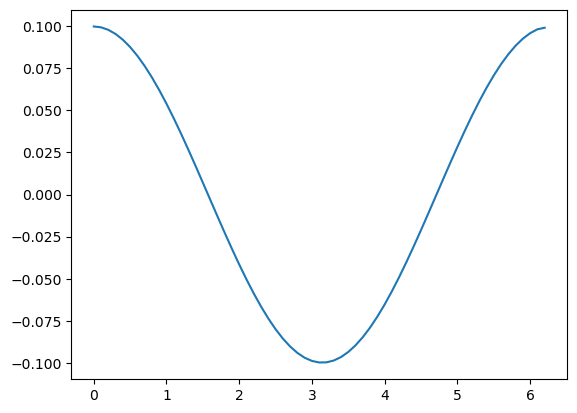

In [157]:
points = np.vstack((x, y)).T
diffs = np.gradient(points, axis=0)
plt.plot(x, diffs[:,1]);
#norm_first_derivative = np.linalg.norm(diffs, axis = 1)
#plt.plot(x, norm_first_derivative);

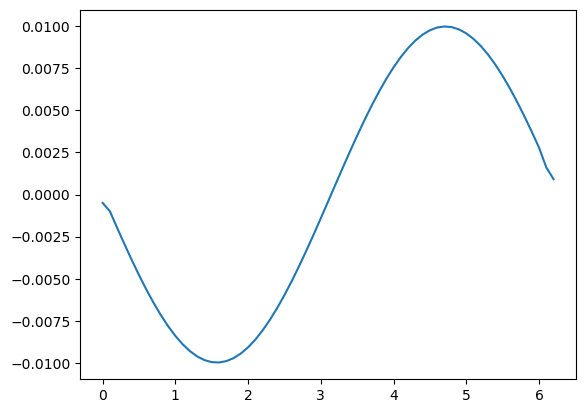

In [74]:
# Gradient of gradient
diffs2=np.gradient(diffs, axis=0)
plt.plot(x, diffs2[:,1]);

**L2 Norm**
*(`np.linalg.norm()`)*

For a vector $X = [X_1, X_2]$,

$$||X||_2 = \sqrt{X_1^2 + X_2^2}$$

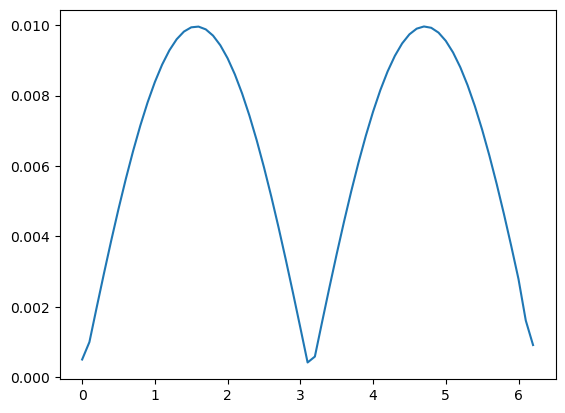

In [76]:
norm_second_derivative = np.linalg.norm(diffs2, axis = 1)
plt.plot(x, norm_second_derivative);

In [77]:
argrelextrema(norm_second_derivative, np.greater)[0]

array([16, 47], dtype=int64)

In [128]:
x[16]

1.6

In [129]:
x[47]

4.7

## Gaussian smoothing
*(`gaussian_filter1d()`)*

**Gaussian probability density function with $\mu=0$:**

$$G(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp\bigg(-\frac{x^2}{2\sigma^2}\bigg)$$

**Kernel radius ($r$):**

$$r = round(4\sigma)$$

**Gaussian Kernel size ($s$):**

$$s = 2r + 1$$

**Gaussian kernel:**

$$G(k) = \frac{1}{\sqrt{2\pi}\sigma}\exp\bigg(-\frac{k^2}{2\sigma^2}\bigg), \ k = -r,...,0,...r$$

**Normalized Gaussian kernel**

$$G_n(k) =  \frac{G(k)}{\sum_{k = -r}^{r} G(k)}$$

**Convolving the data with the Gaussian kernel for smoothing:**

$$y_{smooth}[i] = \sum_{k = -r}^ry[i-k]G_n(k)$$,

where:

- $y[i-k]$: neighbors around index $i$
- $G_n(k)$: Gaussian weights

Padding is handled automatically (default: `mode='reflect'`), so the kernel doesn't go out-of-bounds. This mirrors the array at the edge — like folding the contour back on itself.

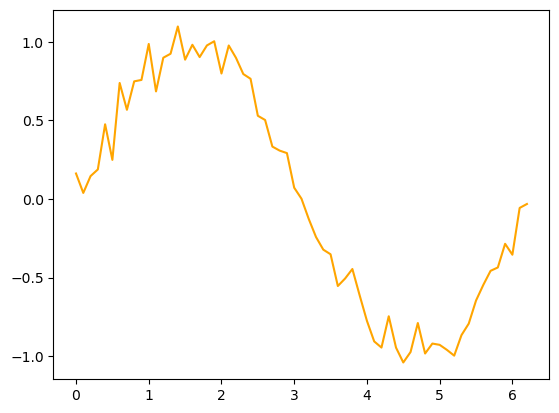

In [161]:
np.random.seed(1)
x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x) + np.random.normal(scale = 0.1, size = len(x))
plt.plot(x, y, color = 'orange');

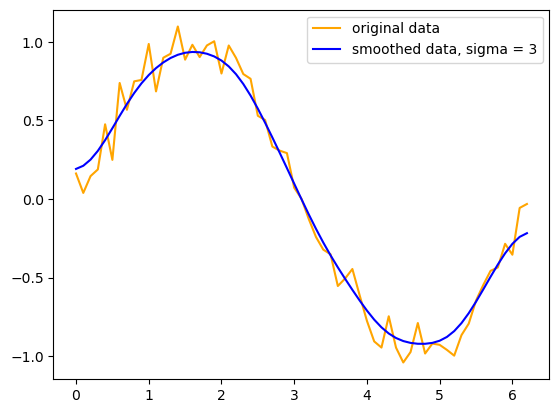

In [162]:
sigma = 3
y_smooth = gaussian_filter1d(y, sigma = sigma)
plt.plot(x, y, label='original data', color ='orange');
plt.plot(x, y_smooth, label='smoothed data, sigma = ' + str(sigma), color = 'blue');
plt.legend();

### More wiggle requires higher $\sigma$

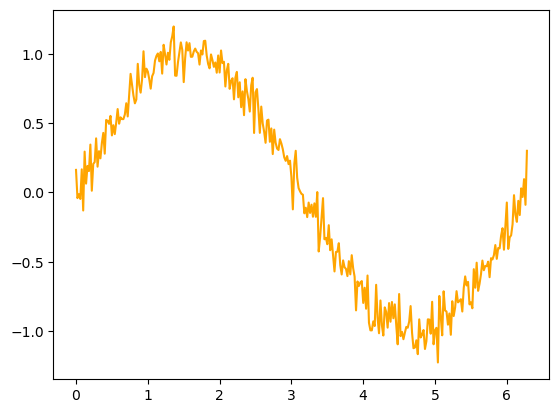

In [163]:
np.random.seed(1)
x = np.arange(0, 2*np.pi, 0.02)
y = np.sin(x) + np.random.normal(scale = 0.1, size = len(x))
plt.plot(x, y, color = 'orange');

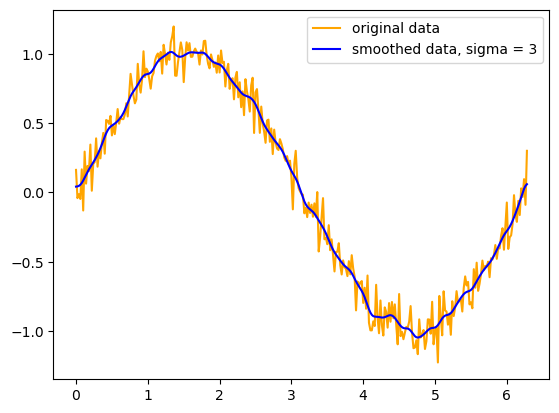

In [146]:
sigma = 3
y_smooth = gaussian_filter1d(y, sigma = sigma)
plt.plot(x, y, label='original data', color = 'orange');
plt.plot(x, y_smooth, label='smoothed data, sigma = ' + str(sigma), color = 'blue');
plt.legend();

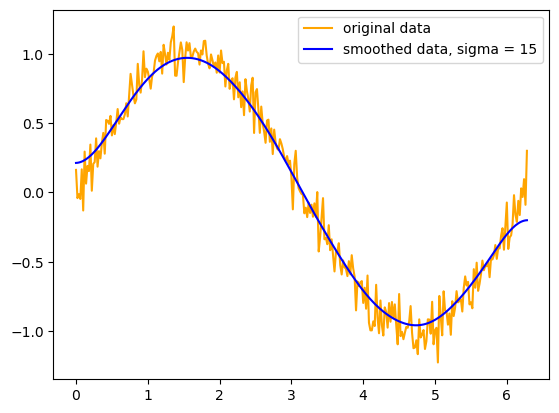

In [147]:
sigma = 15
y_smooth = gaussian_filter1d(y, sigma = sigma)
plt.plot(x, y, label='original data', color = 'orange');
plt.plot(x, y_smooth, label='smoothed data, sigma = ' + str(sigma), color = 'blue');
plt.legend();

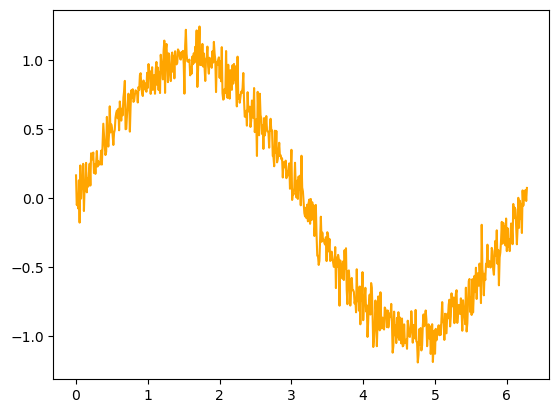

In [148]:
np.random.seed(1)
x = np.arange(0, 2*np.pi, 0.01)
y = np.sin(x) + np.random.normal(scale = 0.1, size = len(x))
plt.plot(x, y, color = 'orange');

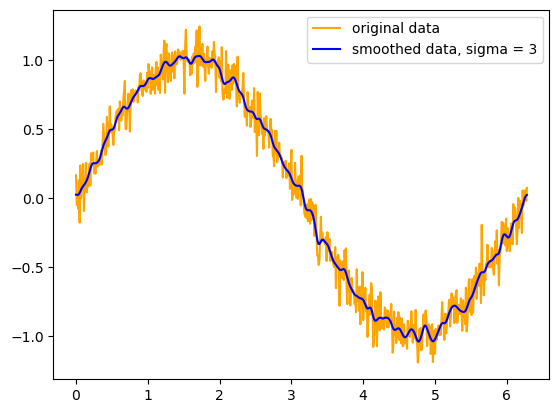

In [149]:
sigma = 3
y_smooth = gaussian_filter1d(y, sigma = sigma)
plt.plot(x, y, label='original data', color = 'orange');
plt.plot(x, y_smooth, label='smoothed data, sigma = ' + str(sigma), color = 'blue');
plt.legend();

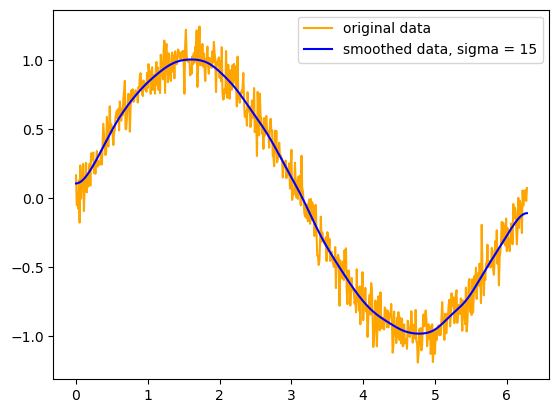

In [150]:
sigma = 15
y_smooth = gaussian_filter1d(y, sigma = sigma)
plt.plot(x, y, label='original data', color = 'orange');
plt.plot(x, y_smooth, label='smoothed data, sigma = ' + str(sigma), color = 'blue');
plt.legend();

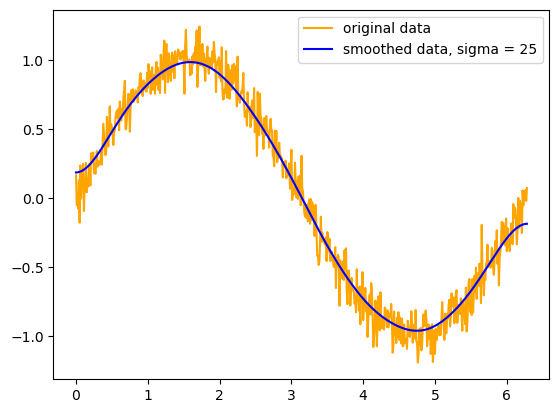

In [151]:
sigma = 25
y_smooth = gaussian_filter1d(y, sigma = sigma)
plt.plot(x, y, label='original data', color = 'orange');
plt.plot(x, y_smooth, label='smoothed data, sigma = ' + str(sigma), color = 'blue');
plt.legend();